In [33]:
import pandas as pd
from IPython.display import display

# Ładowanie przekształconych danych

Do każdego utworu został przypisany najczęściej występujący gatunek spośród gatunków przypisanych do wykonawcy

In [34]:
from data_cleanup import get_clean_merged_tracks_data

tracks_data = pd.read_json("data/tracks.jsonl", lines=True)
MIN_GENRE_OCCURRENCES_TO_KEEP_ROW = 200
artists_data = pd.read_json("data/artists.jsonl", lines=True)
clean_merged_tracks_data = get_clean_merged_tracks_data(artists_data, tracks_data, MIN_GENRE_OCCURRENCES_TO_KEEP_ROW)

display(clean_merged_tracks_data)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0,291227,0,0.603,0.517,6,-8.504,0.0235,0.6950,0.000003,0.7440,0.327,96.181,4,pop
1,25,332333,0,0.527,0.429,8,-12.431,0.0321,0.6550,0.000000,0.0865,0.277,97.893,4,pop
2,45,282400,0,0.667,0.742,10,-7.226,0.0254,0.1260,0.000000,0.0497,0.750,131.995,4,pop
3,4,207267,0,0.734,0.793,10,-4.049,0.0612,0.7000,0.000043,0.3400,0.857,128.209,4,pop
4,50,252427,0,0.602,0.774,0,-13.083,0.0338,0.0312,0.000057,0.0497,0.971,135.125,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89694,22,235093,0,0.706,0.722,6,-3.991,0.0417,0.1150,0.058700,0.0403,0.958,79.452,4,soul
89695,18,238013,0,0.615,0.653,8,-9.163,0.0327,0.0169,0.000010,0.3310,0.569,95.971,4,pop
89696,37,234373,0,0.612,0.442,4,-8.332,0.0355,0.1940,0.000000,0.1040,0.269,77.549,4,pop
89697,49,289427,1,0.644,0.781,10,-6.572,0.3470,0.3560,0.000000,0.3740,0.960,75.832,4,hip-hop


Ilości wystąpień w danych

In [35]:
clean_merged_tracks_data["genre"].value_counts()

genre
pop        48336
rock       23088
jazz        6656
hip-hop     3607
folk        2358
soul        1742
house       1189
metal       1049
indie        919
punk         755
Name: count, dtype: int64

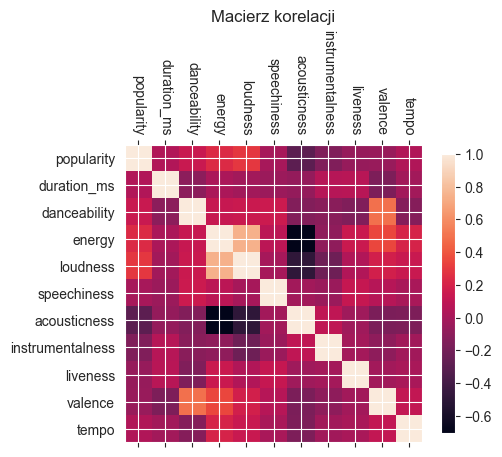

In [36]:
from matplotlib import pyplot as plt
df = clean_merged_tracks_data.drop(columns=['genre', 'time_signature', 'explicit', 'key'])
plt.matshow(df.corr())

labs = df.columns
plt.xticks(range(0, 11), labs, rotation=270)
plt.yticks(range(0, 11), labs, rotation=0)
plt.title("Macierz korelacji")
plt.colorbar(shrink=0.75)
plt.savefig("plots/macierz_korelacji.png", bbox_inches = "tight")

# Rozkłady atrybutów

/var/folders/jb/jqvy28dj5cn6nck9v8wmrsp00000gp/T/ipykernel_5804/545054039.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3, 3))


<Figure size 300x300 with 0 Axes>

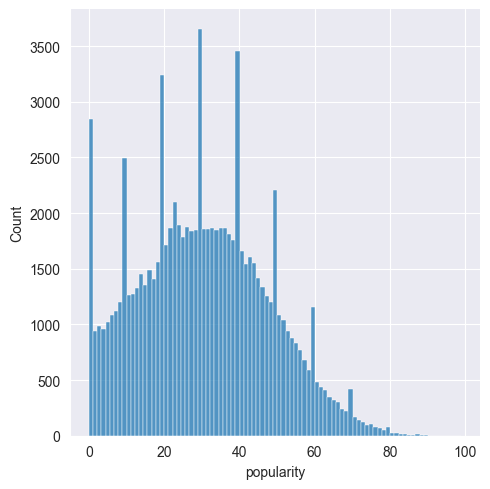

<Figure size 300x300 with 0 Axes>

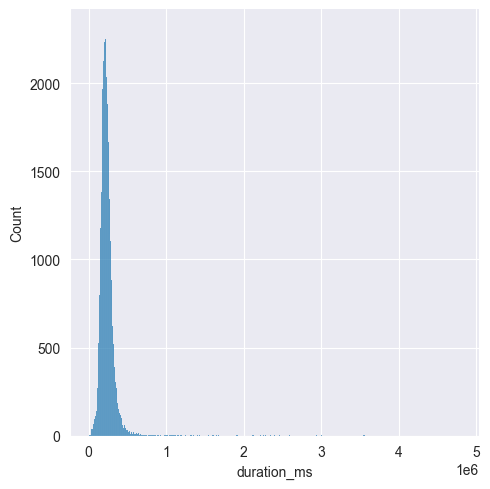

<Figure size 300x300 with 0 Axes>

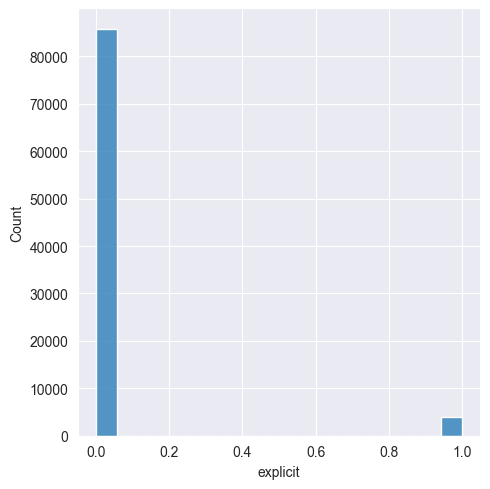

<Figure size 300x300 with 0 Axes>

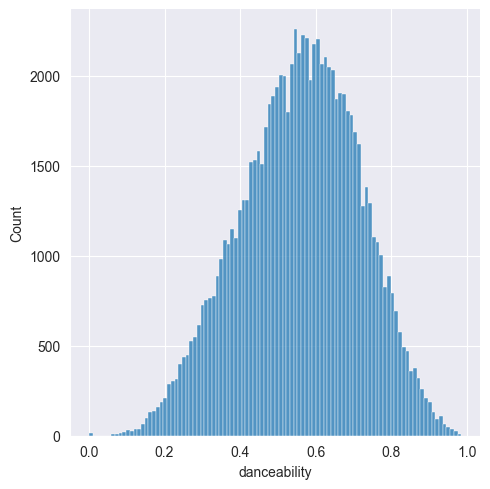

<Figure size 300x300 with 0 Axes>

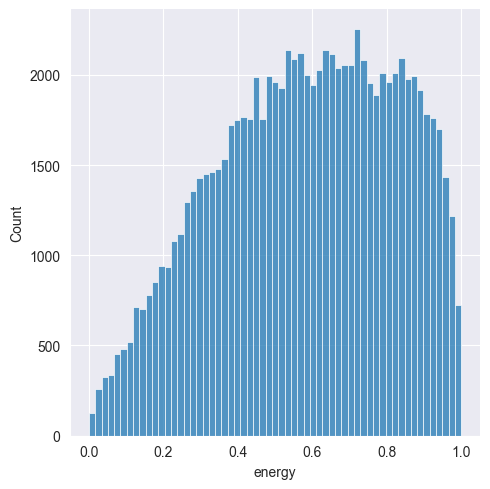

<Figure size 300x300 with 0 Axes>

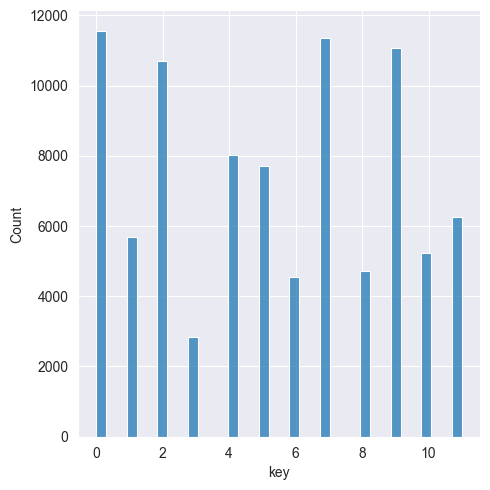

<Figure size 300x300 with 0 Axes>

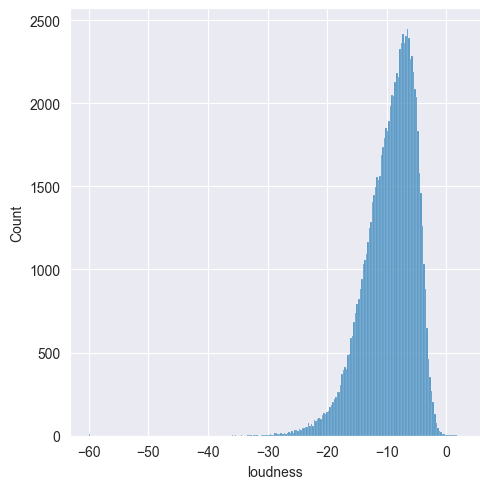

<Figure size 300x300 with 0 Axes>

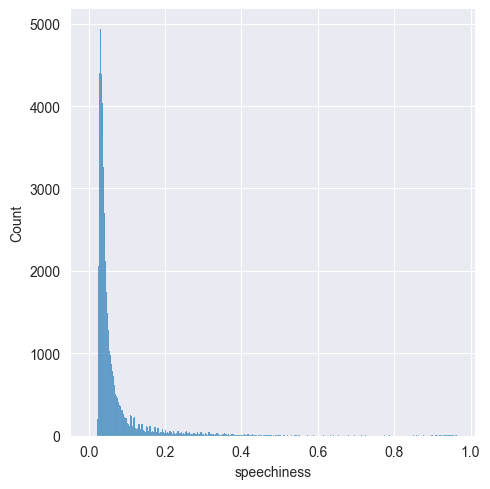

<Figure size 300x300 with 0 Axes>

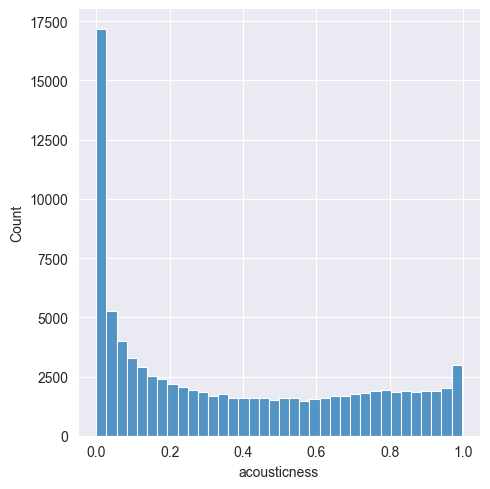

<Figure size 300x300 with 0 Axes>

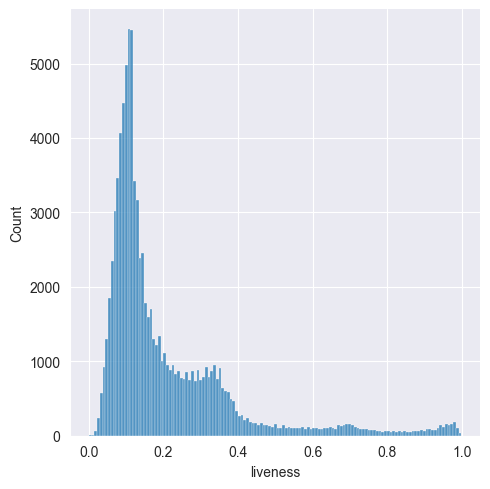

<Figure size 300x300 with 0 Axes>

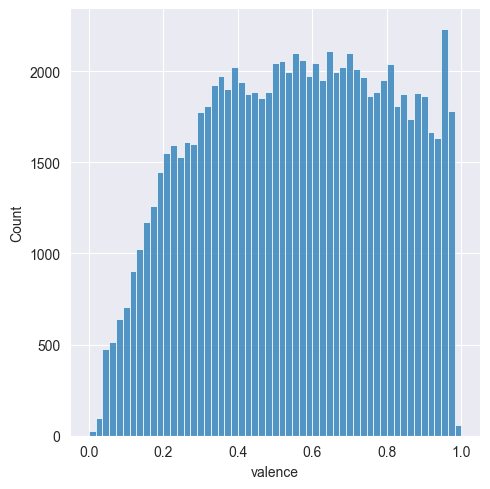

<Figure size 300x300 with 0 Axes>

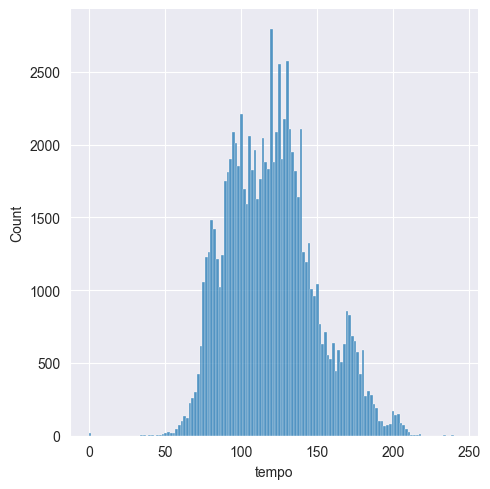

<Figure size 300x300 with 0 Axes>

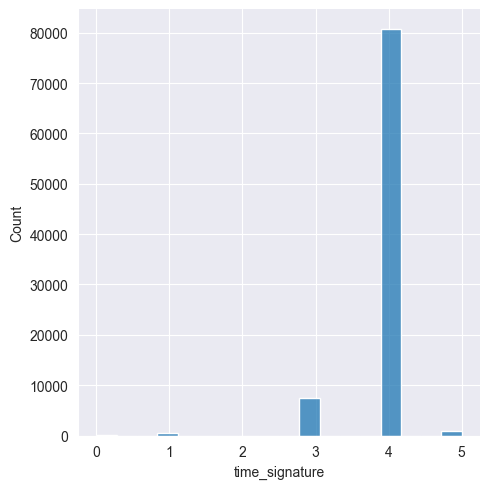

<Figure size 300x300 with 0 Axes>

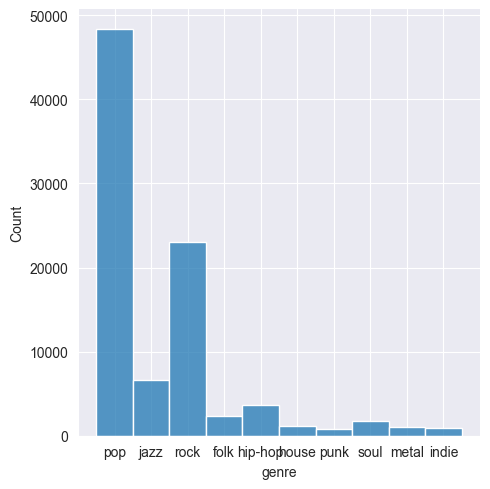

<Figure size 100x100 with 0 Axes>

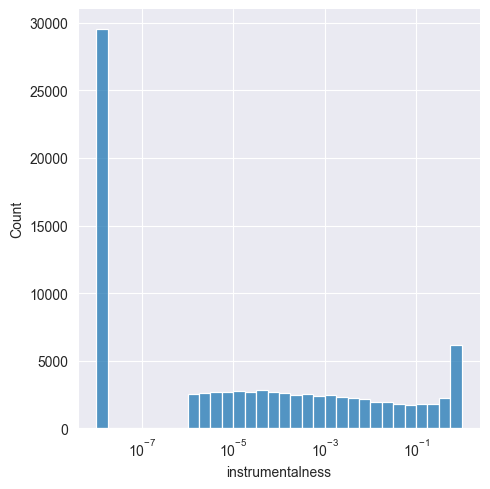

In [37]:
import seaborn as sns
features = list(clean_merged_tracks_data.columns)
features.remove("instrumentalness")
for feat in features:
    plt.figure(figsize=(3, 3))
    plot = sns.displot(clean_merged_tracks_data[feat], kde = False)
    fig = plot.fig
    fig.savefig(f"plots/{feat}.png")

#instrumentalness ze skala logarytmiczna
df_rem = df['instrumentalness'].replace(to_replace=0, value=1e-8)
plt.figure(figsize=(1, 1))
plot = sns.displot(df_rem, kde = False, log_scale=True)
fig = plot.fig
fig.savefig(f"plots/{'instrumentalness'}.png")

In [38]:
from sklearn.metrics import mutual_info_score
discrete_features = ['explicit', 'key', 'time_signature']
features = clean_merged_tracks_data.drop(columns='genre').columns
info_scores = {}
for feat in features:
    if feat not in discrete_features:
        discrete = pd.cut(clean_merged_tracks_data[feat], bins=10000, duplicates='drop')
        info_scores[feat] = round(mutual_info_score(discrete, clean_merged_tracks_data['genre']), 3)
    else:
        info_scores[feat] = round(mutual_info_score(clean_merged_tracks_data[feat], clean_merged_tracks_data['genre']), 3)
info_scores

{'popularity': 0.074,
 'duration_ms': 0.096,
 'explicit': 0.043,
 'danceability': 0.09,
 'energy': 0.151,
 'key': 0.021,
 'loudness': 0.198,
 'speechiness': 0.131,
 'acousticness': 0.219,
 'instrumentalness': 0.138,
 'liveness': 0.086,
 'valence': 0.079,
 'tempo': 0.262,
 'time_signature': 0.004}

# Normalizacja atrybutów

In [39]:
categorical_columns = ["genre", "time_signature", "explicit", "key"]
data_to_normalize = clean_merged_tracks_data.drop(columns=categorical_columns)
normalized_data = (data_to_normalize - data_to_normalize.min()) / (data_to_normalize.max() - data_to_normalize.min())

In [40]:
clean_merged_tracks_data[list(data_to_normalize.columns)] = normalized_data[list(data_to_normalize.columns)]

# Podział danych, oversampling danych treningowych, odrzucenie mało informatywnych atrybutów
Oversampling wszystkich klas do ilości próbek w klasie większościowej

In [41]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

X  = clean_merged_tracks_data.drop(columns=["genre", "time_signature", "explicit", "key", "duration_ms"])
y = clean_merged_tracks_data["genre"]

rus = RandomOverSampler(random_state=0, sampling_strategy="auto")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, y_train = rus.fit_resample(X_train, y_train)

# GNB

model bazowy

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

# Ewaluacja GNB
Słabe wyniki, duża ilość pomyłek dla klasy większościowej

0.1370680044593088


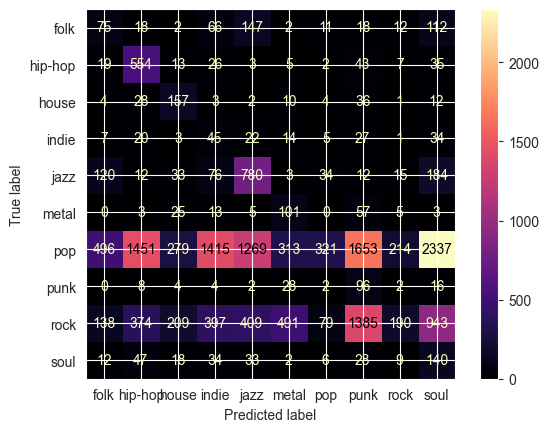

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results = [True for actual, pred in zip(y_test, y_pred) if actual == pred]
print(len(results)/len(y_test))

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap='magma')

# Random forest

model docelowy

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    criterion='entropy',
    n_estimators=200,
    n_jobs=-1,
    random_state=0
)
y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)

# Ewaluacja random forest
znacznie lepsze wyniki niż dla modelu bazowego. Wiele pomyłek dla klas o mniejszej liczności - trzeba jednak zwrócić uwagę na pochodzenie danych - nie możemy być pewni, że etykiety w danych są prawidłowe, gdyż zostały dobrane za pomocą heurystyki opisanej w projekcie wstępnym. Ponadto wiele piosenek może kwalifikować się do wielu gatunków muzycznych.

0.639241917502787


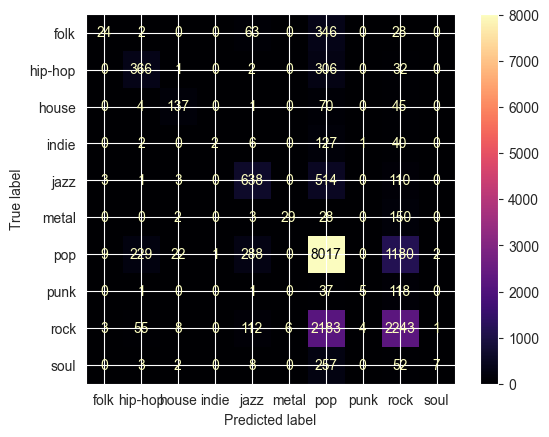

In [45]:
results = [True for actual, pred in zip(y_test, y_pred_rfc) if actual == pred]
print(len(results)/len(y_test))

cm = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap='magma')

# Random forest z inną strategią oversamplingu (do 3500 próbek)
zmiana nie przyniosła zauważalnych korzystnych efektów.

0.6438127090301003


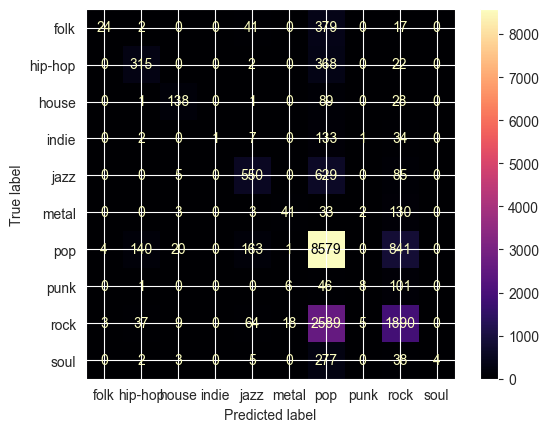

In [46]:
X  = clean_merged_tracks_data.drop(columns=["genre", "time_signature", "explicit", "key", "duration_ms"])
y = clean_merged_tracks_data["genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sampling_strategy = dict(y_train.value_counts())
for genre in sampling_strategy:
    if sampling_strategy[genre] < 3500:
        sampling_strategy[genre] = 3500

rus = RandomOverSampler(random_state=0, sampling_strategy=sampling_strategy)
X_train, y_train = rus.fit_resample(X_train, y_train)

rfc2 = RandomForestClassifier(
    criterion='entropy',
    n_estimators=200,
    n_jobs=-1,
    random_state=0
)
y_pred_rfc = rfc2.fit(X_train, y_train).predict(X_test)

results = [True for actual, pred in zip(y_test, y_pred_rfc) if actual == pred]
print(len(results)/len(y_test))

cm = confusion_matrix(y_test, y_pred_rfc, labels=rfc2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc2.classes_)
disp.plot(cmap='magma')

# GNB z inna strategią oversamplingu (do 3500 probek)
znaczna poprawa jakości modelu bazowego

0.4729654403567447


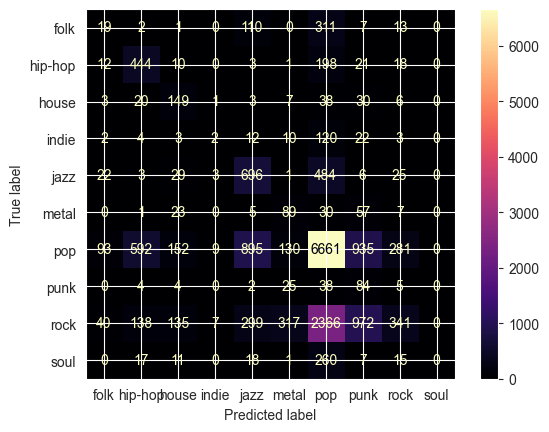

In [47]:
gnb2 = GaussianNB()
y_pred = gnb2.fit(X_train, y_train).predict(X_test)
results = [True for actual, pred in zip(y_test, y_pred) if actual == pred]
print(len(results)/len(y_test))

cm = confusion_matrix(y_test, y_pred, labels=gnb2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb2.classes_)
disp.plot(cmap='magma')

# Zapis modeli (Random forest z oversamplingiem wersji 1, gnb z oversamplingiem wersji 2)

In [48]:
import pickle

with open('models/gnb_model.pickle', 'wb') as handle:
    pickle.dump(gnb2, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('models/rfc_model.pickle', 'wb') as handle:
    pickle.dump(rfc, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Mikroserwis
W ramach projektu stworzyliśmy również mikroserwis serwujący predykcje dla podanych danych wejściowych. Posiada on jeden endpoint `/predict`, który można zawołać z query parametrem `model` stanowiącym wybór modelu bazowego `BASE` lub docelowego `FINAL`.

Przykładowy payload wygląda następująco:
```
[
    {"id": "708ZiYL3ydBWHS2a7gvJB3", "name": "031 - Der Schatz im Silbersee I - Teil 39", "popularity": 13, "duration_ms": 75040, "explicit": 0, "id_artist": "0PCtW4w0RN89andUBQ3TVv", "release_date": "1968-09-11", "danceability": 0.74, "energy": 0.891, "key": 7, "mode": null, "loudness": -7.48, "speechiness": 0.892, "acousticness": 0.839, "instrumentalness": 0.0, "liveness": 0.869, "valence": 0.557, "tempo": 51.496, "time_signature": 4},
    {"id": "5MTOOscJ6J6idzcgKVgOPc", "name": "Iulia - Instrumental\u0103", "popularity": 3, "duration_ms": 234913, "explicit": 0, "id_artist": "4ajE8OLyErszRCZNQMUq2c", "release_date": "1977-01-01", "danceability": 0.437, "energy": 0.483, "key": 2, "mode": null, "loudness": -16.848, "speechiness": 0.0392, "acousticness": 0.061, "instrumentalness": 0.0103, "liveness": 0.144, "valence": 0.592, "tempo": 121.682, "time_signature": 4}
]
```

Odpowiedź api:
```
[
  {
    "artist_id": "0PCtW4w0RN89andUBQ3TVv",
    "labels": [
      "pop"
    ]
  },
  {
    "artist_id": "4ajE8OLyErszRCZNQMUq2c",
    "labels": [
      "rock"
    ]
  }
]
```

Aplikację można uruchomić na dwa sposoby (komendy wykonywane w głównym folderze repozytorium):
1. Uvicorn, wersja lokalna
```
pip install -r requirements.txt
cd api
uvicorn api:app --host 0.0.0.0 --port 8080
```

2. Docker, wersja skonteneryzowana
```
cd api
docker compose up -d
```